(258, 309, 3)
(86, 86, 3)
(480, 640, 3)
(408, 612, 3)


/home/tj/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(744, 847, 3)


SyntaxError: 'return' outside function (<ipython-input-9-41b4f3031b8d>, line 25)

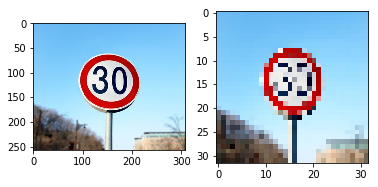

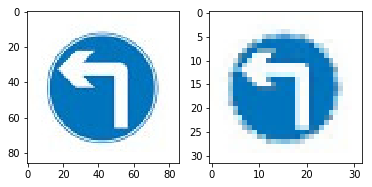

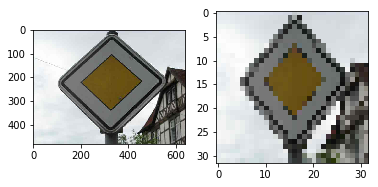

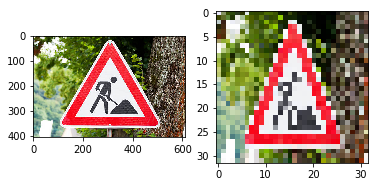

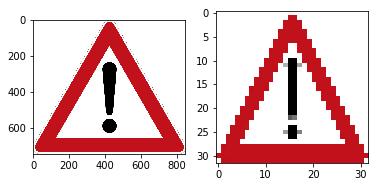

In [9]:
import pickle
import numpy as np
from skimage.io import imread
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.pyplot as plt



# Load in and resize images
labels = np.array([1, 34, 12, 25, 18])
images = np.ones([5, 32, 32, 3], dtype=np.uint8)


for i in range(5):
    im = imread("%06d.jpg" % (i+1))
    print(im.shape)
    image = resize(im, (32, 32))*255
    images[i] = image.astype(np.uint8)

    plt.figure()
    plt.subplot(1,2,2)
    plt.imshow(images[i])
    plt.subplot(1,2,1)
    plt.imshow(im)
return images

In [10]:
print('Pixel range of images:')
print(np.min(images))
print(np.max(images))

imp = {
    'images': images,
    'labels': labels
}

pickle.dump(imp, open('external.pkl', 'wb'))
print('Pickle dumped')

Pixel range of images:
0
255
Pickle dumped


---

## Load in the Image


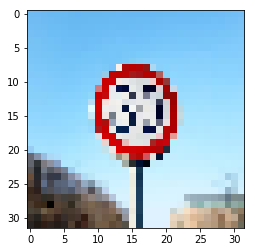

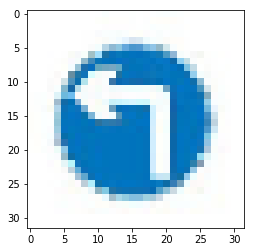

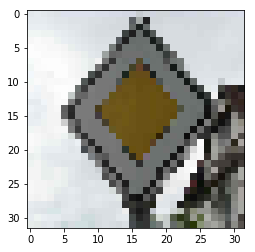

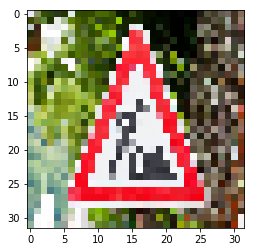

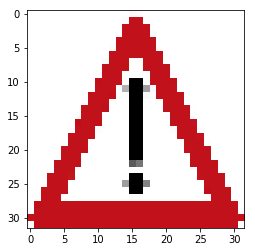

In [8]:
import pickle

with open('external.pkl', mode='rb') as f:
    imported = pickle.load(f)
    
images = imported['images']
for im in images:
    plt.figure()
    plt.imshow(im)

---

## Rotation Example with Generated Image


/home/tj/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/tj/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/tj/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


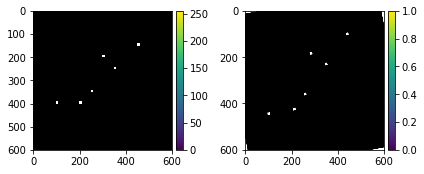

In [58]:
import skimage
from skimage import novice

# New, all black picture
pic = skimage.novice.Picture.from_size((600, 600), color=(0, 0, 0))
all_dots = [200, 200, 250, 250, 350, 350, 450, 450, 100, 200, 300, 400]
# Coloring some pixels in white
for i in range(0, len(all_dots) - 1, 2):
    x = all_dots[i]
    y = all_dots[i + 1]
    pic[x:x+10, y:y+10] = (255, 255, 255)

from skimage.transform import rotate

desired_shape = pic.array.shape
pic_scaled = rescale(pic.array, 1.125)
new_pic = rotate(pic_scaled, 10)

# Crop
pad_width = int((new_pic.shape[0] - desired_shape[0])/2.)
pad_height = int((new_pic.shape[1] - desired_shape[1])/2.)
new_pic = new_pic[pad_width:-pad_width, pad_height:-pad_height]
# Also new_pic = rotate(pic, 180).shape does not work

from skimage.io import imshow_collection, imshow

imshow_collection([pic.array, new_pic])

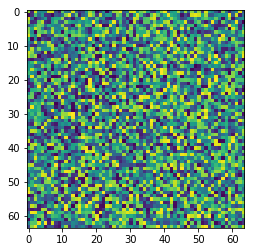

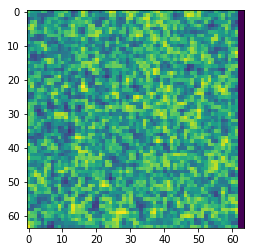

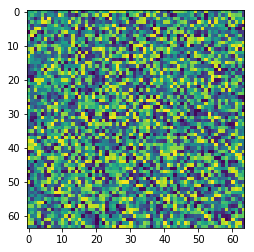

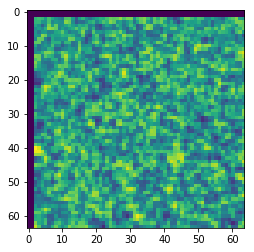

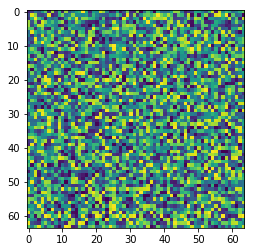

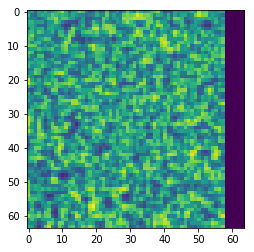

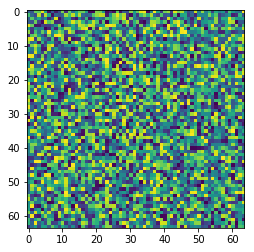

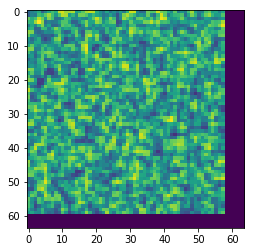

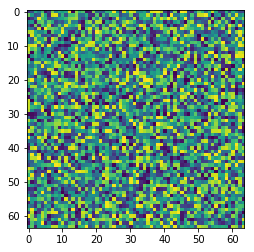

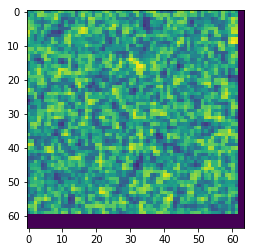

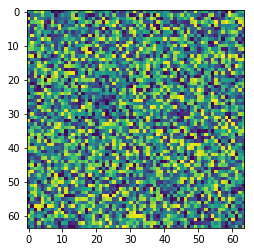

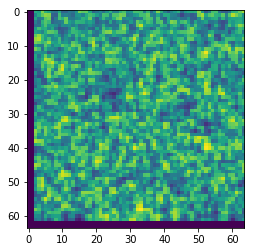

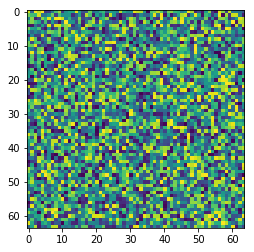

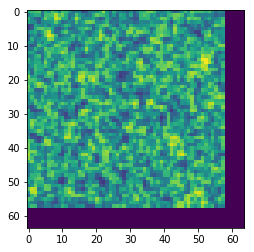

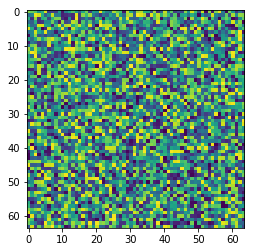

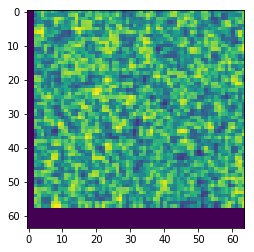

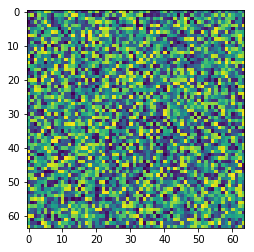

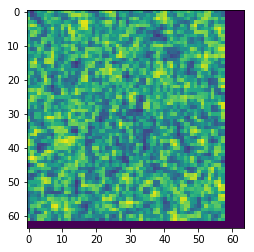

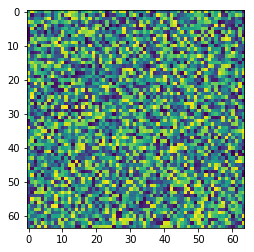

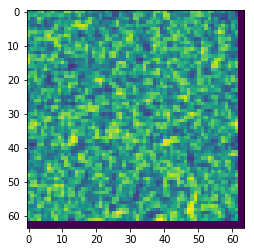

In [41]:
from scipy.ndimage.interpolation import shift



def add_shift_to_image(im):
    di = [ 2*np.random.randint(5) - 6, 2*np.random.randint(5) - 6 ]
    im_out = np.copy(im)
    shift(im, di, output=im_out, prefilter=False)
    return im_out

for i in range(10):
    im = np.random.random([64, 64])
    plt.figure()
    plt.imshow(im)
    im_transformed = add_shift_to_image(im)
    plt.figure()
    plt.imshow(im_transformed)